## Train Test Split
---


In [1]:
## first merge modeling_df and test_df with the newly created features

import json
import pandas as pd
import numpy as np
import pickle as pkl
from rdsutils.aws import download_s3 #, python_object_to_s3
from rdsutils.lightgbm_helpers import train_lgb_baseline_grouped
import rdsutils.plot as rdsplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

In [2]:
#
# transactions_df = pd.read_parquet("s3://sofi-data-science/jxu/money-risk-models/deposit-risk-v2-ach/data/2021-01-04/transactions_df_labeled_all.parquet")
transactions_df = pd.read_parquet("../../artifacts/final/transactions_df_labeled_all.parquet")

In [3]:
transactions_df.columns[transactions_df.columns.str.contains("name")]

Index(['name_address_correlation', 'name_email_correlation',
       'name_phone_correlation'],
      dtype='object')

In [4]:
transactions_df.shape

(21093178, 229)

<AxesSubplot:>

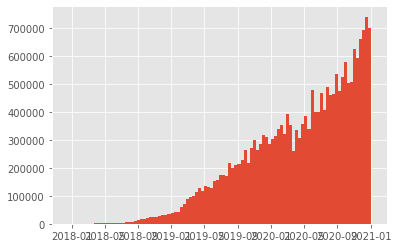

In [5]:
transactions_df.transaction_datetime.hist(bins=100)

#### Split

In [6]:
modeling_df = transactions_df[transactions_df["transaction_datetime"].between(pd.to_datetime('2020-05-01'),
                                                    pd.to_datetime('2020-07-31'))]
test_df = transactions_df[transactions_df["transaction_datetime"].between(pd.to_datetime('2020-08-01'),
                                                                          pd.to_datetime('2020-12-31'))]

In [7]:
def drop_non_ach(df):
    df = df[df['transaction_code'].isin(['ACHDD']) & (df['transaction_amount'] > 0)]
    return df

modeling_df = drop_non_ach(modeling_df)
test_df = drop_non_ach(test_df)

In [8]:
modeling_df.is_returned.value_counts()

False    108825
True       3774
Name: is_returned, dtype: int64

In [9]:
test_df.is_returned.value_counts()

False    243591
True      13307
Name: is_returned, dtype: int64

In [10]:
modeling_df.to_parquet('s3://sofi-data-science/jxu/money-risk-models/deposit-risk-v2-ach/data/2021-01-04/modeling_df.parquet')
test_df.to_parquet('s3://sofi-data-science/jxu/money-risk-models/deposit-risk-v2-ach/data/2021-01-04/test_df.parquet')